Here we apply the camera and stereo calibration data to a 3D scene of one of the meteorite samples.

Steps:
- load images
- load calibration data for cameras
- load calibration data for stereo pairs
- apply rectification
- find point matches
- find disparity map
- find 3D points
- bundle adjust 3D points to build model

# Setup

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import orochi_sim_proc as osp
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# get the location of this notebook
import os
from pathlib import Path
notebook_dir = Path(os.path.abspath(''))
cali_dir = Path(notebook_dir, 'stereo_calibration_processing_22082023_outputs')
cali_dir.mkdir(parents=True, exist_ok=True)

# Loading Images

Loaded 25 images (img) for: 0 (850 nm)
Loading geom_calibration_sample_22082023: 0 (850 nm)
Loaded 25 images (drk) for: 0 (850 nm)
Subtracting dark frame for: 0 (850 nm)
Loaded 25 images (img) for: 1 (475 nm)
Loading geom_calibration_sample_22082023: 1 (475 nm)
Loaded 25 images (drk) for: 1 (475 nm)
Subtracting dark frame for: 1 (475 nm)
Loaded 25 images (img) for: 2 (400 nm)
Loading geom_calibration_sample_22082023: 2 (400 nm)
Loaded 25 images (drk) for: 2 (400 nm)
Subtracting dark frame for: 2 (400 nm)
Loaded 25 images (img) for: 3 (550 nm)
Loading geom_calibration_sample_22082023: 3 (550 nm)
Loaded 25 images (drk) for: 3 (550 nm)
Subtracting dark frame for: 3 (550 nm)
Loaded 25 images (img) for: 4 (725 nm)
Loading geom_calibration_sample_22082023: 4 (725 nm)
Loaded 25 images (drk) for: 4 (725 nm)
Subtracting dark frame for: 4 (725 nm)
Loaded 25 images (img) for: 5 (950 nm)
Loading geom_calibration_sample_22082023: 5 (950 nm)
Loaded 25 images (drk) for: 5 (950 nm)
Subtracting dark fr

{'0_850': <orochi_sim_proc.LightImage at 0x177396230>,
 '1_475': <orochi_sim_proc.LightImage at 0x16e270910>,
 '2_400': <orochi_sim_proc.LightImage at 0x1771a95d0>,
 '3_550': <orochi_sim_proc.LightImage at 0x16e07fcd0>,
 '4_725': <orochi_sim_proc.LightImage at 0x16e2fcf40>,
 '5_950': <orochi_sim_proc.LightImage at 0x16e212230>,
 '6_650': <orochi_sim_proc.LightImage at 0x1774b1ed0>,
 '7_550': <orochi_sim_proc.LightImage at 0x1772079a0>}

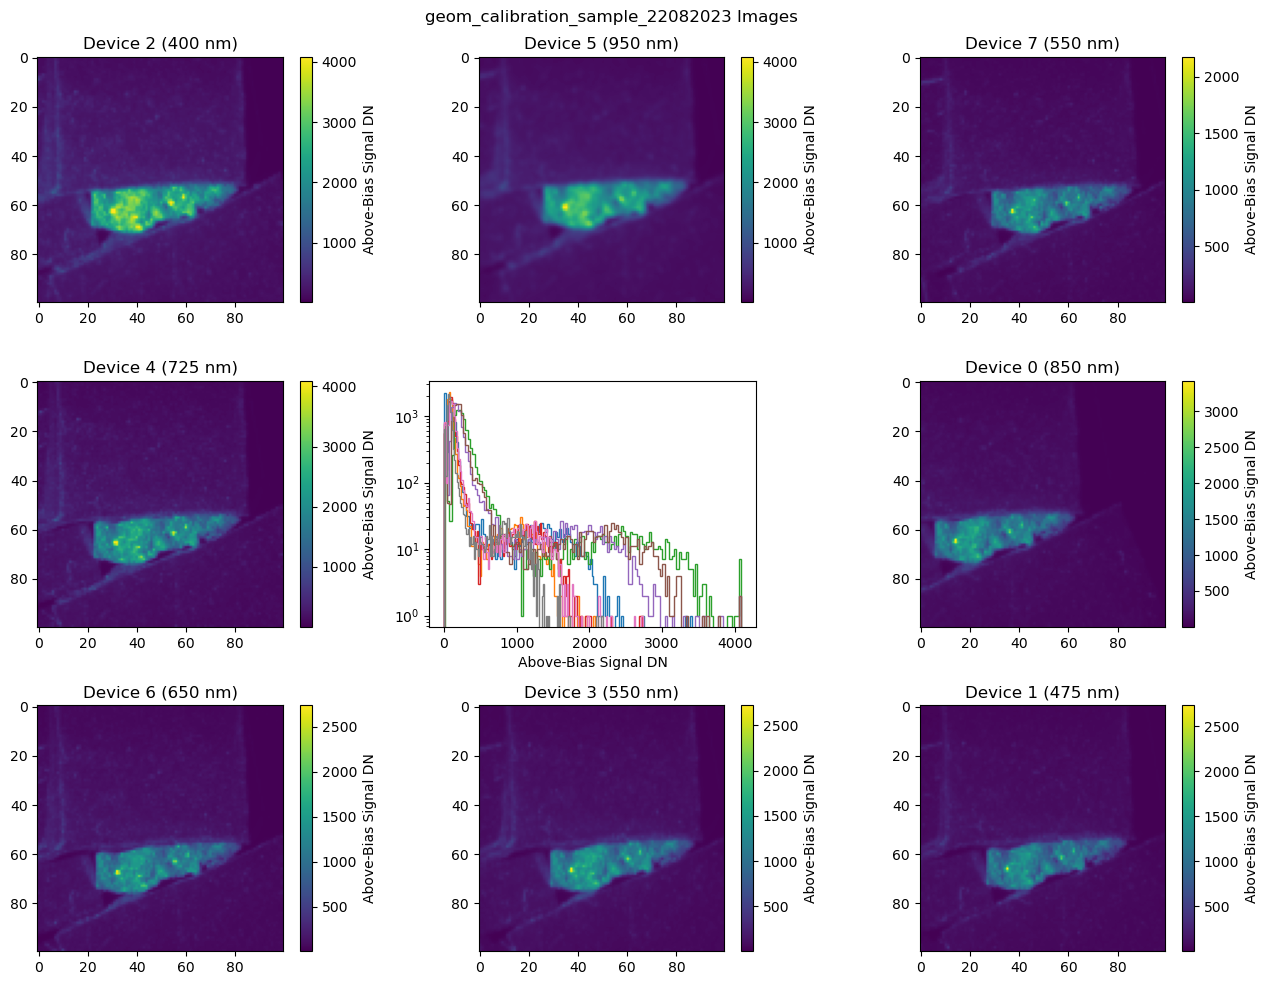

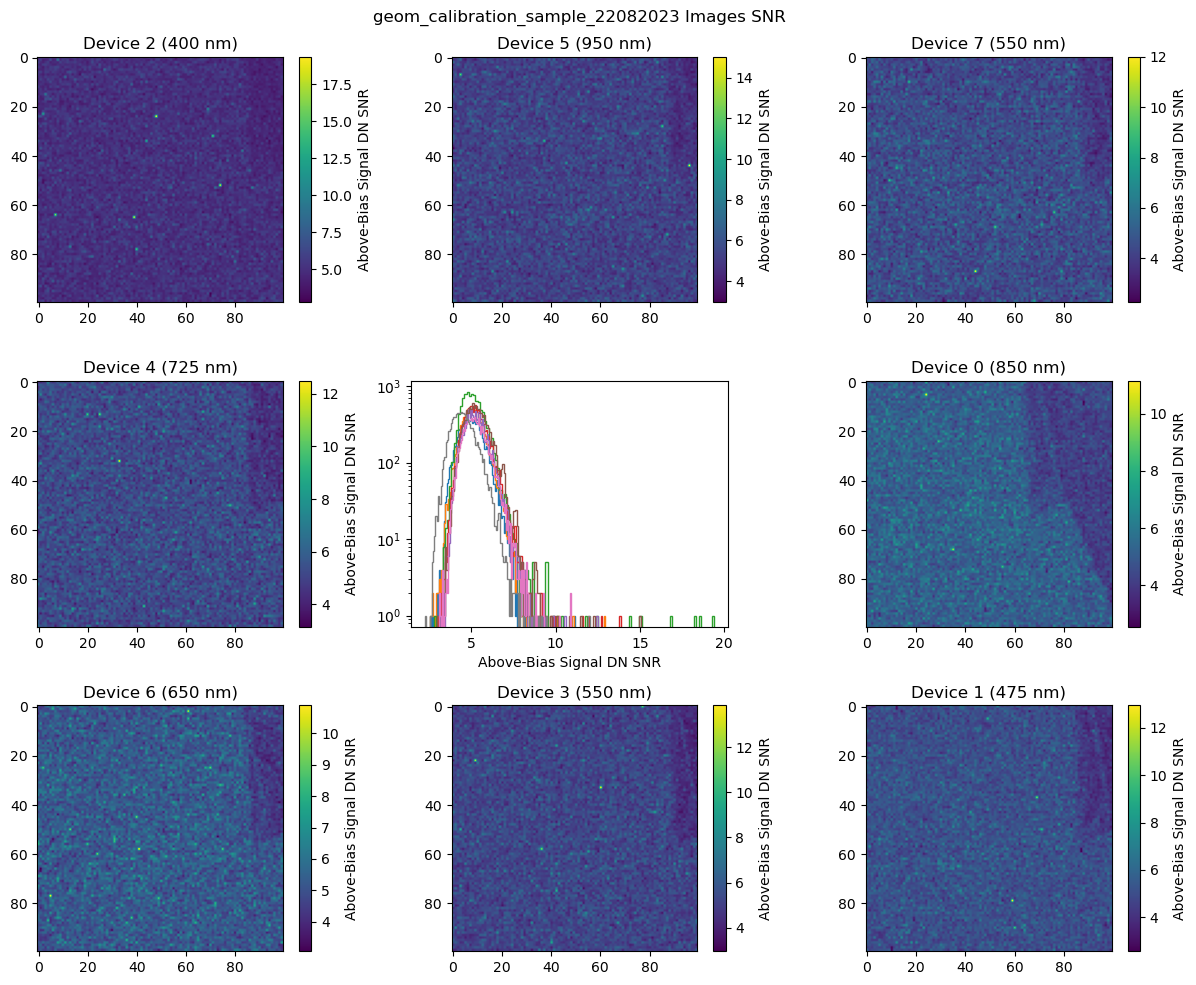

In [7]:
osp.load_sample(subject='geom_calibration_sample_22082023', dark_subject='geom_calibration_dark_22082023', roi=True)

Note that the infrared channels in particular are quite poorly focused, and these images have been captured without the spectral filters in place.

Next steps are to load calibration data...etc...